## Data exploration and data preprocessing for the congressional voting dataset

The folder includes 3 .csv files:
* CongressionalVotingID.shuf.lrn.csv *- the training data set*
* CongressionalVotingID.shuf.sol.ex.csv *- a sample solution file in the correct format* 
* CongressionalVotingID.shuf.tes.csv *- the test dataset*


The data contains one integer ID column and multiple object columns


For side note in Kaggle: https://medium.com/mcd-unison/using-the-kaggle-api-e43e902fba23

In [2]:
import pandas as pd
import numpy as np

### Import and first overview of the data

In [3]:
# load the data
congVoting_train = pd.read_csv('./data/CongressionVoting/CongressionalVotingID.shuf.lrn.csv')
congVoting_test = pd.read_csv('./data/CongressionVoting/CongressionalVotingID.shuf.tes.csv')
congVoting_sol = pd.read_csv('./data/CongressionVoting/CongressionalVotingID.shuf.sol.ex.csv')
print(f"The shape of the data looks as follows: train - {congVoting_train.shape}, test - {congVoting_test.shape}, sol - {congVoting_sol.shape}")

The shape of the data looks as follows: train - (218, 18), test - (217, 17), sol - (217, 2)


In [4]:
congVoting_train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,249,republican,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,140,democrat,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
2,383,democrat,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
3,201,democrat,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
4,297,republican,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y


In [5]:
congVoting_train.head()
# I assume the ID is the key of the test data and the sol could be merged on to the test data by using the ID
 
len(set(congVoting_test.ID)& set(congVoting_sol.ID))
len(set(congVoting_test.ID)& set(congVoting_train.ID))

print(f"The congVoting_test data shares {len(set(congVoting_test.ID)& set(congVoting_sol.ID))} IDs with the congVoting_sol data and {len(set(congVoting_test.ID)& set(congVoting_train.ID))} IDs with the congVoting_train data")

The congVoting_test data shares 217 IDs with the congVoting_sol data and 0 IDs with the congVoting_train data


The previous code chunkshows, that in deed, the IDs are the same in test and sol and additionally that none of the test IDs occur in the train dataset. Thus for different split one could combine both datasets.

In [6]:
congVoting = pd.concat([congVoting_train,pd.merge(congVoting_test, congVoting_sol, on='ID', how='inner')])
congVoting.head()
print(f"The new merged dataset has the following shape: {congVoting.shape}")

The new merged dataset has the following shape: (435, 18)


In [7]:
congVoting_train.dtypes

ID                                         int64
class                                     object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-crporation-cutback               object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
dtype: object

### Missing value handling

In [8]:
#congVoting_train.isna().sum()
# The unknowns are represented by the string 'unknown'

congVoting_train.apply(pd.Series.value_counts).loc['unknown']


ID                                         NaN
class                                      NaN
handicapped-infants                        7.0
water-project-cost-sharing                21.0
adoption-of-the-budget-resolution          4.0
physician-fee-freeze                       6.0
el-salvador-aid                            9.0
religious-groups-in-schools                5.0
anti-satellite-test-ban                    6.0
aid-to-nicaraguan-contras                 10.0
mx-missile                                12.0
immigration                                4.0
synfuels-crporation-cutback               13.0
education-spending                        16.0
superfund-right-to-sue                    14.0
crime                                      7.0
duty-free-exports                         14.0
export-administration-act-south-africa    58.0
Name: unknown, dtype: float64

In [9]:
congVoting_train.set_index('ID', inplace=True)

In [10]:
rowiseMissingValues = congVoting_train.apply(pd.Series.value_counts, axis=1).sort_values(by='unknown', ascending=False).loc[:,['unknown']]
print(f"There are {rowiseMissingValues.isna().sum()[0]} rows, that not contain any NaN/unkown values.")


There are 111 rows, that not contain any NaN/unkown values.


In [11]:
rowiseMissingValues = congVoting_train.apply(pd.Series.value_counts, axis=1).sort_values(by='unknown', ascending=False).loc[:,['unknown']]

# Drop the rows with number of missing values bigger than a defined threshold

# Threshold number is the half of the number of features
missingValueThreshold = round(congVoting_train.shape[1]*0.5)
rowsToDrop = rowiseMissingValues[rowiseMissingValues['unknown'] > missingValueThreshold]




rowsWithNan = rowiseMissingValues[rowiseMissingValues['unknown'] > 0]
congVoting_train_wo_nan = congVoting_train.drop(rowsWithNan.index)
congVoting_train_wo_nan.shape

congVoting_train.drop(rowsToDrop.index, inplace=True)
congVoting_train.shape




(217, 17)

### Convert data boolean data to integers

The features column have the types 'n','y' and 'unknown'. This will be converted to 0,1,NaN.

In [12]:
def convert_values_to_numeric(df):
    # Define the mapping for conversion
    mapping = {'n': 0, 'y': 1, 'unknown': np.nan}

    # Use the replace function to perform the conversion
    converted_df = df.replace(mapping)

    return converted_df

def convert_numeric_to_values(df):
    # Define the mapping for conversion
    mapping = {0: 'n', 1: 'y', np.nan:'unknown'}

    # Use the replace function to perform the conversion
    converted_df = df.replace(mapping)

    return converted_df

In [13]:
to_number_test = convert_values_to_numeric(congVoting_train)
print(f"List the number of uniue values in the column crime: {to_number_test.crime.unique()}")
print(f"For testing, print the number of NaN values in the column crime: {to_number_test.crime.isna().sum()}")

to_numeric_test = convert_numeric_to_values(to_number_test)
print(f"List the number of uniue values in the column crime: {to_numeric_test.crime.unique()}")
print(f"For testing, print the number of NaN values in the column crime: {to_numeric_test.crime.isna().sum()}")

List the number of uniue values in the column crime: [ 0.  1. nan]
For testing, print the number of NaN values in the column crime: 6
List the number of uniue values in the column crime: ['n' 'y' 'unknown']
For testing, print the number of NaN values in the column crime: 0


In [14]:
congVoting_train["class"].unique()

array(['democrat', 'republican'], dtype=object)

In [15]:
# congVoting_test = convert_values_to_numeric(congVoting_train)
# congVoting_test.head()

## Experimenting with the classification

In [16]:
# data without NaN values: congVoting_train_wo_nan
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer, KNNImputer

# no imputation is required
congVoting_train_wo_nan_numeric = convert_values_to_numeric(congVoting_train_wo_nan)
congVoting_train_wo_nan_numeric_x = congVoting_train_wo_nan_numeric.drop('class', axis=1)
congVoting_train_w_nan_numeric =  convert_values_to_numeric(congVoting_train)
congVoting_train_w_nan_numeric_x = congVoting_train_w_nan_numeric.drop('class', axis=1)

# Impution with iterative imputer
imp_iter = IterativeImputer(max_iter=10, random_state=0)
imp_iter.fit(congVoting_train_wo_nan_numeric_x)
iter_imput_x = imp_iter.transform(congVoting_train_w_nan_numeric_x)
iter_imput_x = np.around(iter_imput_x)


test_df = congVoting_train_w_nan_numeric_x.copy()
# Impution with KNN imputer
imp_knn = KNNImputer(n_neighbors=5, weights="distance")
iter_knn_x = imp_knn.fit_transform(congVoting_train_w_nan_numeric_x)
iter_knn_x = np.around(iter_knn_x)

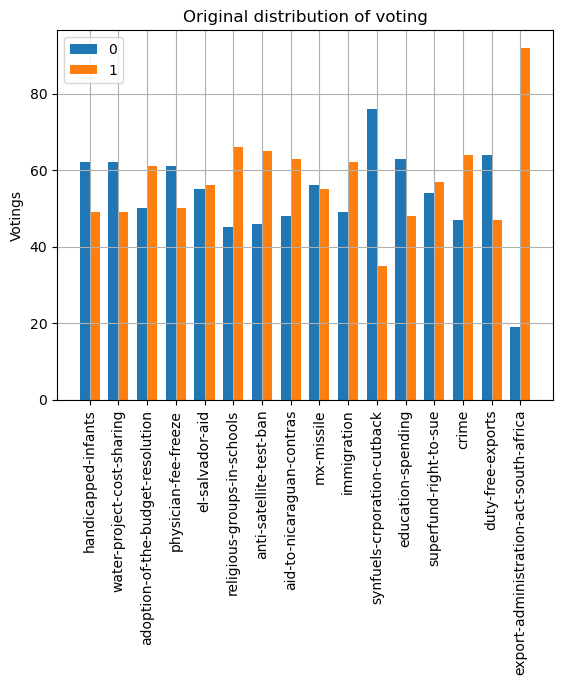

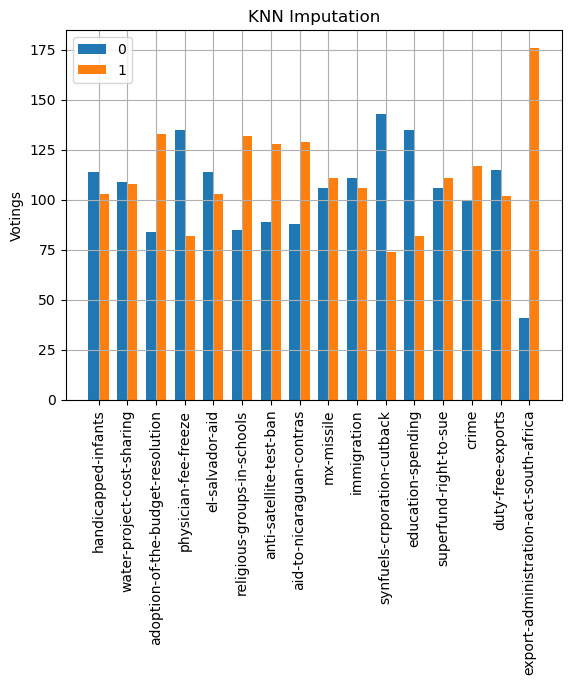

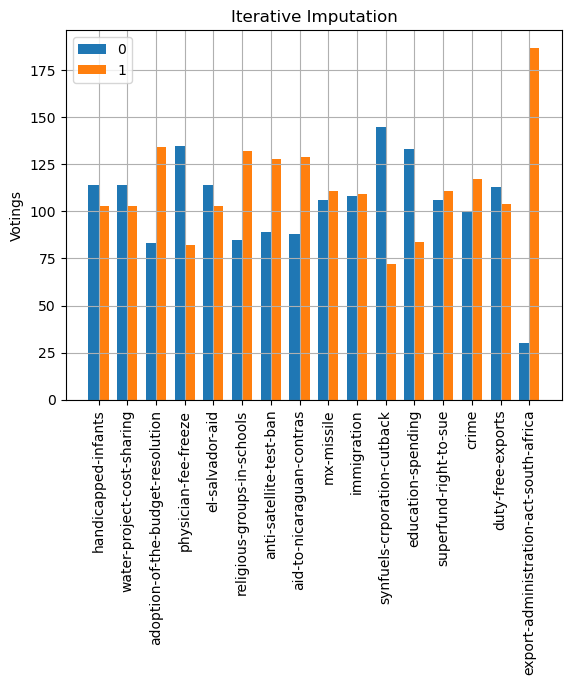

In [17]:
import matplotlib.pyplot as plt

# Original distribution of voting
dist_df = congVoting_train_wo_nan_numeric_x.apply(pd.Series.value_counts)
#print(dist_df)
# dist_df.iloc[0].plot(kind="bar", alpha = 0.7)

x = np.arange(len(dist_df.columns))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dist_df.iloc[0,], width, label='0')
rects2 = ax.bar(x + width/2, dist_df.iloc[1,], width, label='1')

ax.set_ylabel('Votings')
ax.set_title("Original distribution of voting")
ax.set_xticks(x)
ax.set_xticklabels(dist_df.columns)
ax.legend()
plt.xticks(rotation=90)
plt.grid()

# Using KNN imputer
iter_knn_x = pd.DataFrame(iter_knn_x, columns=congVoting_train_w_nan_numeric_x.columns)
iter_knn_sumup = iter_knn_x.apply(pd.Series.value_counts)
#print(iter_knn_sumup)
# dist_df.iloc[0].plot(kind="bar", alpha = 0.7)

x = np.arange(len(iter_knn_sumup.columns))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, iter_knn_sumup.iloc[0,], width, label='0')
rects2 = ax.bar(x + width/2, iter_knn_sumup.iloc[1,], width, label='1')

ax.set_ylabel('Votings')
ax.set_title("KNN Imputation")
ax.set_xticks(x)
ax.set_xticklabels(iter_knn_sumup.columns)
ax.legend()
plt.xticks(rotation=90)
plt.grid()

# Using iterative imputer
iter_imput_x = pd.DataFrame(iter_imput_x, columns=congVoting_train_w_nan_numeric_x.columns)
iter_imput_sumup = iter_imput_x.apply(pd.Series.value_counts)
#print(iter_knn_sumup)
# dist_df.iloc[0].plot(kind="bar", alpha = 0.7)

x = np.arange(len(iter_imput_sumup.columns))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, iter_imput_sumup.iloc[0,], width, label='0')
rects2 = ax.bar(x + width/2, iter_imput_sumup.iloc[1,], width, label='1')

ax.set_ylabel('Votings')
ax.set_title("Iterative Imputation")
ax.set_xticks(x)
ax.set_xticklabels(iter_imput_sumup.columns)
ax.legend()
plt.xticks(rotation=90)
plt.grid()



In [18]:
iter_imput_sumup

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0.0,114,114,83,135,114,85,89,88,106,108,145,133,106,100,113,30
1.0,103,103,134,82,103,132,128,129,111,109,72,84,111,117,104,187


### Save the preprocessed data to its folder

In [54]:
# first add the Y column and the index to the imputed data
iter_imput_x["class"] = congVoting_train_w_nan_numeric["class"]
iter_imput_x.set_index(congVoting_train_w_nan_numeric.index, inplace=True)
iter_imput_x.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,class
ID,,,,,,,,,,,,,,,,,
140,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,democrat
383,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,democrat
201,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,democrat
297,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,republican
309,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,republican


In [52]:
congVoting_train_w_nan_numeric.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
ID,,,,,,,,,,,,,,,,,
140,democrat,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
383,democrat,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN
201,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
297,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
309,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [55]:
iter_imput_x.to_csv('./preprocessed-datasets/CongressionVoting_prepro.csv')

Based on the results above, one can conclude, that the **iterative imputer** resulted in a better imputation, as the relation of 0 and 1 values for each column is more similar to the relation in case of rows without NaN values.